# Criação de um dicionário Python para facilitar acesso aos dados dos jogadores no site FBRef.com | Principais ligas europeias

## Importação das bibliotecas

In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.6 MB/s 


In [3]:
import pandas as pd
import unidecode
import json

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Acesso aos dados

In [5]:
f = 'players_fbref.csv'

In [6]:
df = pd.read_csv(f, header=1)
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,-9999
0,1,Brenden Aaronson,us USA,MFFW,Leeds United,eng Premier League,21-354,2000.0,8,8,654,7.3,1,1,1,0,0,2,0,0.14,0.14,0.28,0.14,0.28,1.4,1.4,0.5,1.9,0.20,0.07,0.26,0.20,0.26,Matches,5bc43860
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35-013,1987.0,10,10,900,10.0,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.4,0.4,0.1,0.6,0.04,0.01,0.06,0.04,0.06,Matches,32c2d95f
2,3,Himad Abdelli,fr FRA,MFFW,Angers,fr Ligue 1,22-328,1999.0,4,0,52,0.6,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.5,0.5,0.05,0.82,0.87,0.05,0.87,Matches,7978cbf0
3,4,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,22-199,2000.0,10,10,900,10.0,1,0,1,0,0,1,0,0.10,0.00,0.10,0.10,0.10,0.3,0.3,0.2,0.4,0.03,0.02,0.04,0.03,0.04,Matches,82464ce3
4,5,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-252,1993.0,10,10,807,9.0,0,1,0,0,0,2,0,0.00,0.11,0.11,0.00,0.11,0.2,0.2,0.4,0.6,0.02,0.05,0.07,0.02,0.07,Matches,31626657


In [7]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Matches',
       '-9999'],
      dtype='object')

In [8]:
df.Pos.unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'FWDF', 'GK', 'DFFW', 'MFDF',
       'DFMF'], dtype=object)

## Criação de um dicionário

In [9]:
players_dict = {name: {'squad': squad, 'pos': pos, 'code': code} for name, squad, pos, code in zip(df['Player'], df['Squad'], df['Pos'],df['-9999'])}

In [10]:
players_dict

{'Brenden Aaronson': {'squad': 'Leeds United',
  'pos': 'MFFW',
  'code': '5bc43860'},
 'Yunis Abdelhamid': {'squad': 'Reims', 'pos': 'DF', 'code': '32c2d95f'},
 'Himad Abdelli': {'squad': 'Angers', 'pos': 'MFFW', 'code': '7978cbf0'},
 'Salis Abdul Samed': {'squad': 'Lens', 'pos': 'MF', 'code': '82464ce3'},
 'Laurent Abergel': {'squad': 'Lorient', 'pos': 'MF', 'code': '31626657'},
 'Matthis Abline': {'squad': 'Rennes', 'pos': 'FWMF', 'code': '0e46fa2f'},
 'Zakaria Aboukhlal': {'squad': 'Toulouse', 'pos': 'FWMF', 'code': 'c2a6033c'},
 'Tammy Abraham': {'squad': 'Roma', 'pos': 'FW', 'code': 'f586779e'},
 'Francesco Acerbi': {'squad': 'Inter', 'pos': 'DF', 'code': 'b96b595c'},
 'Mohamed Achi': {'squad': 'Nantes', 'pos': 'MF', 'code': '1e93fc5d'},
 'Marcos Acuña': {'squad': 'Sevilla', 'pos': 'DF', 'code': '81442ecb'},
 'Che Adams': {'squad': 'Southampton', 'pos': 'FW', 'code': 'f2bf1b0f'},
 'Tyler Adams': {'squad': 'Leeds United', 'pos': 'MF', 'code': '2b09d998'},
 'Sargis Adamyan': {'squa

In [12]:
players_dict['Javi']['code']

'9a76c2e9'

## Salvar num arquivo json

In [13]:
with open('players_data.JSON', 'w') as f:
  json.dump(players_dict, f, indent=2)

## Ler o arquivo json salvo

In [14]:
with open('players_data.JSON', 'r') as f:
  pl_data = json.load(f)

## Checar os dados obtidos

In [ ]:
pl_data

In [16]:
pl_data['Javi']['code']

'9a76c2e9'

## Criar uma função para gerar um DataFrame a partir dos dados

In [17]:
def player_data(names: list) -> list:
  dfs = []
  for _, n in zip(range(len(pl_data)), names):
    name_str = unidecode.unidecode(n).replace(' ', '-')
    code = pl_data[n]['code']
    pos = pl_data[n]['pos']
    squad = pl_data[n]['squad']
 
    url = f'https://fbref.com/en/players/{code}/scout/365_euro/{name_str}-Scouting-Report'
    try:
        dff = pd.read_html(url, header=1)[0].drop('Percentile', axis=1).dropna(axis=0)      
        dff = dff.drop(dff[dff['Statistic'] == 'Statistic'].index)
        dff = dff.drop(dff[dff['Statistic'] == dff['Per 90']].index)
        dff['Player'] = n
        dff['Squad'] = squad
        dff['Pos'] = pos
        
        dff['Per 90'] = dff['Per 90'].str.rstrip('%').astype('float')
        dff = dff.pivot_table(index=['Player', 'Squad', 'Pos'], columns='Statistic', values='Per 90', aggfunc='mean')
        
        dfs.append(dff)
        
    except:
      print('No such data')
  return pd.concat(dfs).reset_index()

In [18]:
dt = player_data(['Reece James', 'Ismaily', 'Theo Hernández', 'Bruno Guimarães', 'Raphaël Guerreiro'])

dt

Statistic,Player,Squad,Pos,% of Aerials Won,% of dribblers tackled,Aerials lost,Aerials won,Assists,Average Shot Distance,Ball Recoveries,Blocks,Carries,Carries into Final Third,Carries into Penalty Area,Clearances,Corner Kicks,Crosses,Crosses into Penalty Area,Dead-ball passes,Dispossessed,Dribbled Past,Dribblers Tackled,Dribbles Attempted,Dribbles Completed,Dribbles Contested,Errors,Fouls Committed,Fouls Drawn,GCA (Def),GCA (Drib),GCA (Fld),GCA (PassDead),GCA (PassLive),GCA (Sh),Goal-Creating Actions,Goals,Goals - xG,Goals/Shot,Goals/Shot on target,Ground passes,High Passes,Inswinging Corner Kicks,Interceptions,Key Passes,Live-ball passes,Low Passes,Miscontrols,Non-Penalty Goals,Non-Penalty Goals - npxG,Non-Penalty xG,Nutmegs,Offsides,Outswinging Corner Kicks,Own Goals,Pass Completion %,Pass Completion % (Long),Pass Completion % (Medium),Pass Completion % (Short),Pass Targets,Passes Attempted,Passes Attempted (Head),Passes Attempted (Left),Passes Attempted (Long),Passes Attempted (Medium),Passes Attempted (Other),Passes Attempted (Right),Passes Attempted (Short),Passes Blocked,Passes Completed,Passes Completed (Long),Passes Completed (Medium),Passes Completed (Short),Passes Intercepted,Passes Offside,Passes Out of Bounds,Passes Received,Passes Received %,Passes Under Pressure,Passes from Free Kicks,Passes into Final Third,Passes into Penalty Area,Penalty Kicks Attempted,Penalty Kicks Conceded,Penalty Kicks Made,Penalty Kicks Won,Players Dribbled Past,Pressures,Pressures (Att 3rd),Pressures (Def 3rd),Pressures (Mid 3rd),Progressive Carries,Progressive Carrying Distance,Progressive Passes,Progressive Passes Rec,Progressive Passing Distance,Red Cards,SCA (Def),SCA (Drib),SCA (Fld),SCA (PassDead),SCA (PassLive),SCA (Sh),Second Yellow Card,Shot-Creating Actions,Shots Blocked,Shots Saved,Shots Total,Shots from free kicks,Shots on target,Shots on target %,Straight Corner Kicks,Successful Dribble %,Successful Pressure %,Successful Pressures,Switches,Tackles,Tackles (Att 3rd),Tackles (Def 3rd),Tackles (Mid 3rd),Tackles Won,Through Balls,Throw-Ins taken,Tkl+Int,Total Carrying Distance,Total Passing Distance,Touches,Touches (Att 3rd),Touches (Att Pen),Touches (Def 3rd),Touches (Def Pen),Touches (Live-Ball),Touches (Mid 3rd),Yellow Cards,npxG + xA,npxG/Sh,xG,xG Assisted
0,Reece James,Chelsea,DF,54.3,45.2,1.12,1.33,0.27,21.4,8.35,1.42,63.13,3.02,0.81,1.24,0.87,3.35,0.57,10.98,1.30,0.69,0.57,2.29,1.69,1.27,0.00,1.06,1.63,0.00,0.03,0.00,0.00,0.42,0.03,0.48,0.21,0.11,0.12,0.41,54.83,9.62,0.36,1.15,1.78,66.93,13.45,1.03,0.21,0.11,0.10,0.03,0.21,0.30,0.03,86.6,72.3,88.8,92.8,67.14,77.91,1.57,6.39,10.22,29.95,0.36,60.41,34.93,1.735,67.47,7.39,26.60,32.42,1.66,0.15,0.90,62.19,92.6,11.04,1.90,3.71,2.02,0.00,0.0,0.00,0.00,1.78,12.55,2.65,4.52,5.37,7.66,142.90,5.61,4.25,304.56,0.00,0.06,0.12,0.15,0.42,2.50,0.24,0.00,3.50,0.15,0.00,1.72,0.27,0.51,29.8,0.06,73.7,35.6,4.46,1.48,2.17,0.15,1.12,0.90,1.36,0.06,8.20,3.32,284.90,1184.72,88.70,38.52,2.87,14.93,1.87,77.85,41.59,0.27,0.31,0.06,0.10,0.21
1,Ismaily,Lille,DF,69.7,33.3,0.97,2.23,0.10,16.1,8.45,2.14,39.71,1.94,0.58,2.82,0.00,1.26,0.00,8.64,0.78,1.17,0.58,1.26,0.78,1.75,0.00,0.49,0.78,0.00,0.00,0.00,0.00,0.29,0.00,0.29,0.19,0.08,0.20,0.50,40.97,4.85,0.00,0.97,0.97,47.86,10.68,0.87,0.19,0.08,0.12,0.00,0.19,0.00,0.00,82.6,60.5,82.0,90.2,45.15,56.50,1.65,38.84,3.69,18.84,0.29,6.60,30.78,1.795,46.70,2.23,15.44,27.77,1.75,0.10,0.58,40.97,90.8,7.09,0.97,3.59,0.97,0.00,0.0,0.00,0.00,0.87,10.19,2.52,3.98,3.69,6.12,109.61,4.56,3.20,255.24,0.00,0.10,0.10,0.00,0.10,1.65,0.10,0.00,2.04,0.39,0.00,0.97,0.00,0.39,40.0,0.00,61.5,45.7,4.66,0.19,2.04,0.39,0.78,0.87,1.46,0.00,7.67,3.01,180.58,693.79,67.57,21.75,3.59,17.28,3.30,58.93,32.43,0.00,0.20,0.12,0.12,0.09
2,Theo Hernández,Milan,DF,61.4,57.4,0.59,0.93,0.13,23.2,7.72,1.36,46.61,3.17,0.85,0.98,1.52,2.10,0.35,11.84,1.01,0.61,0.82,2.71,1.46,1.44,0.03,1.14,2.69,0.00,0.03,0.00,0.03,0.27,0.05,0.37,0.13,-0.01,0.05,0.25,39.05,9.31,0.16,1.68,1.70,46.82,10.30,1.30,0.08,

## Gráfico simples de barras

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_theme('paper')

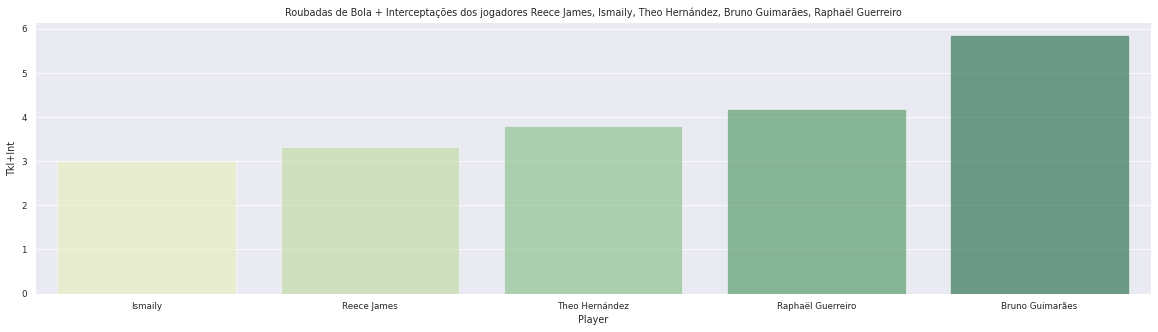

In [27]:
plt.figure(figsize=(20, 5))
plt.title(f"Roubadas de Bola + Interceptações dos jogadores {', '.join(dt.Player)}")
sns.barplot(data=dt.sort_values(by='Tkl+Int'), x='Player', y='Tkl+Int', alpha=0.6, palette='YlGn');